#CS5014 Practical 1

150015752
(Date)

## Overview

In [41]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import ensemble, tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy.stats import pearsonr
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

NUM_OF_REPS = 50

We load the data using pandas library which can also store metadata such as column names. Additionally, pandas' DataFrame objects are easy to manipulate and slice.

In [42]:
dataset = pd.read_csv('ENB2012_data.csv')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


We slice the data to feature values and target values. In this case, feature values are all columns from X1 to X8 and target values are columns Y1 and Y2.


In [43]:
X = dataset.loc[:, 'X1':'X8']
y = dataset.loc[:,'Y1':'Y2']

In [44]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [45]:
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


To better visualize the relation between feature and target values, we implement a function that plots a specified target column as a function of each feature column separately.

In [46]:
def plotCorr(X, y, column_names, res, y_predicts=None):
    # Plot outputs
    num_of_features = X.shape[1]
    height = num_of_features*5
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
        y_vals = y
    else:
        X_vals = X.values
        y_vals = y.values

    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
                                                         " values for " + column_names[col])
        plt.scatter(X_vals[:, col], y_vals[:, res], color='black')
        index+=1

        if y_predicts is not None:
            plt.subplot(num_of_features, 2, index).set_title("Predicted Y" + str(res + 1) + 
                                                             " values for " + column_names[col])
            plt.scatter(X_vals[:, col], y_predicts[:,res], color='blue')
            index+=1
    plt.show()


### Relation plots of feature values for heating load

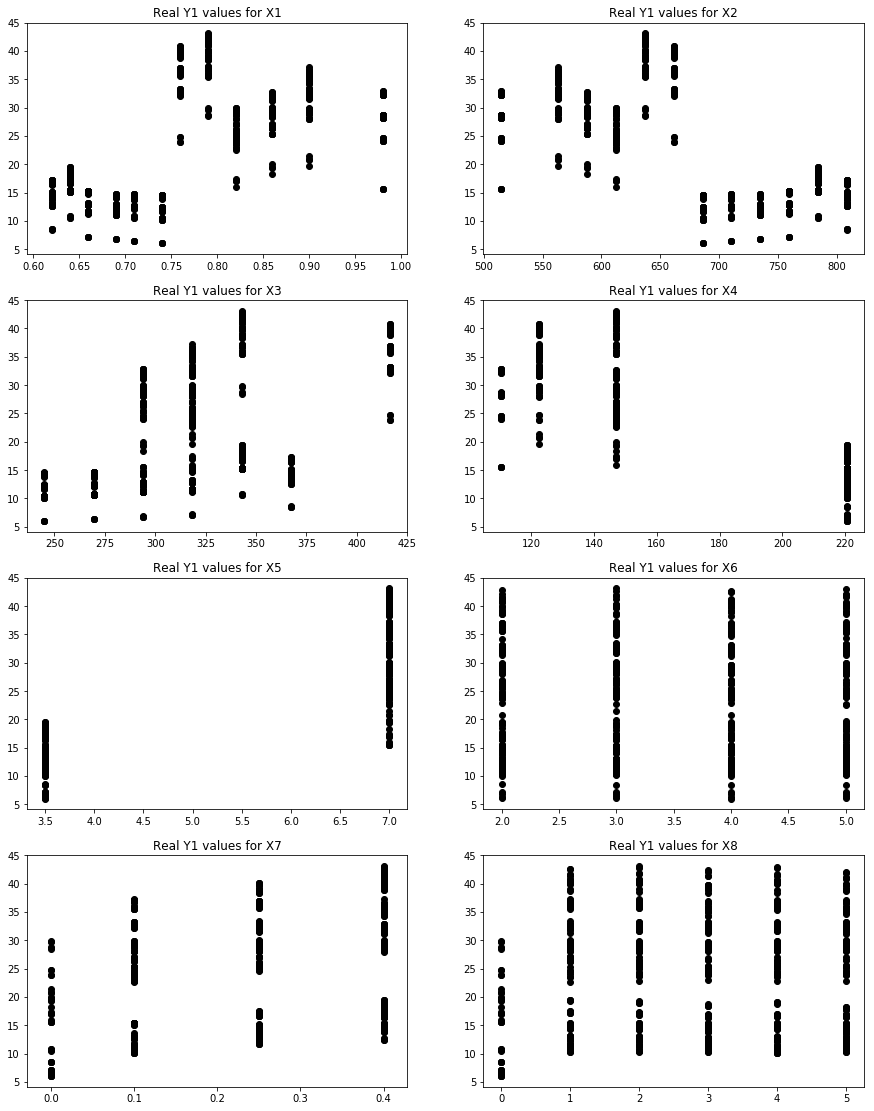

In [47]:
plotCorr(X, y, X.columns, 0)

### Relation plots of feature values for cooling load

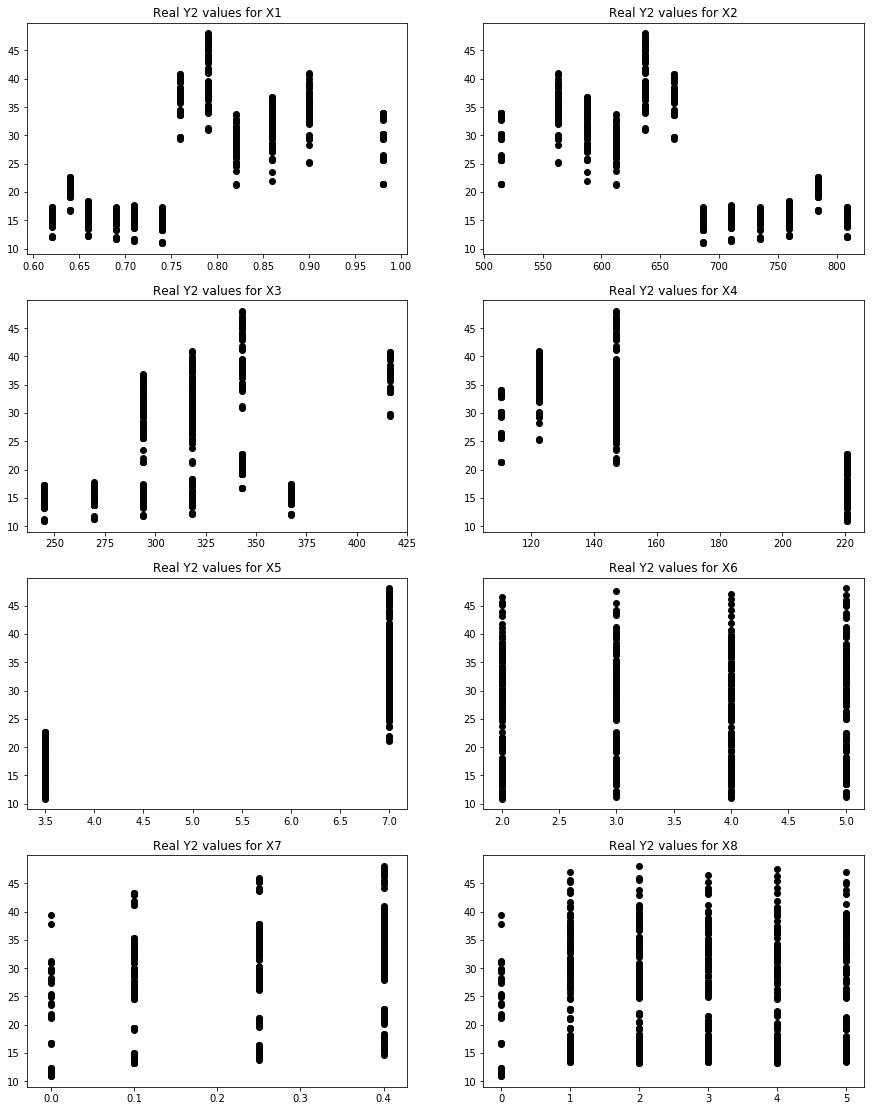

In [48]:
plotCorr(X, y, X.columns, 1)

Particularly for columns X6 and X8, that is Orientation and Glazing area distribution, we may notice that the distribution is very random. We might display the impact all the features have on HL and CL by a Pearson's correlation. Pearson's correlation is a number between -1 and 1 that indicates to what extent are 2 variables linearly related. 1 indicates total positive linear correlation, 0 no linear correlation and -1 total negative correlation. We implement a function that prints out Pearson's correlation for each feature to both HL and CL. 


In [49]:
def getPearsonCorrs(X, y):
    num_of_features = X.shape[1]
    for res in range(0,2):
        print("Pearson's correlation for all features and Y" + str(res + 1))
        for col in range(0,num_of_features):
            print(X.columns[col] + " => " + str(pearsonr(X.values[:,col], y.values[:,res])[0]))
        print('\n')

In [50]:
getPearsonCorrs(X, y)

Pearson's correlation for all features and Y1
X1 => 0.6222721790646626
X2 => -0.6581202267776216
X3 => 0.4556711568983097
X4 => -0.861828252905822
X5 => 0.8894306741007042
X6 => -0.002586533915638776
X7 => 0.2698409963206335
X8 => 0.08736759370846414


Pearson's correlation for all features and Y2
X1 => 0.6343390663353593
X2 => -0.6729989333544865
X3 => 0.42711699766713346
X4 => -0.862546603524974
X5 => 0.8957851688924501
X6 => 0.01428959757617023
X7 => 0.20750499116036222
X8 => 0.050525118805675666




As suspected, both X6 and X8 have a relatively low impact on the target values. These features may have impact on residential building in other areas, but with the dataset we're given they do not and we might create an additional dataset without these 2 columns, to test if there's any change in a regressor accuracy.


In [51]:
def plotHists(X, column_names):
    # Plot outputs
    num_of_features = X.shape[1]
    height = num_of_features*3
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
    else:
        X_vals = X.values

    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title(column_names[col])
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.tight_layout()
        # plt.hist(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
        #                                          " values for " + column_names[col])
        plt.hist(X_vals[:, col])
        index+=1
    plt.show()


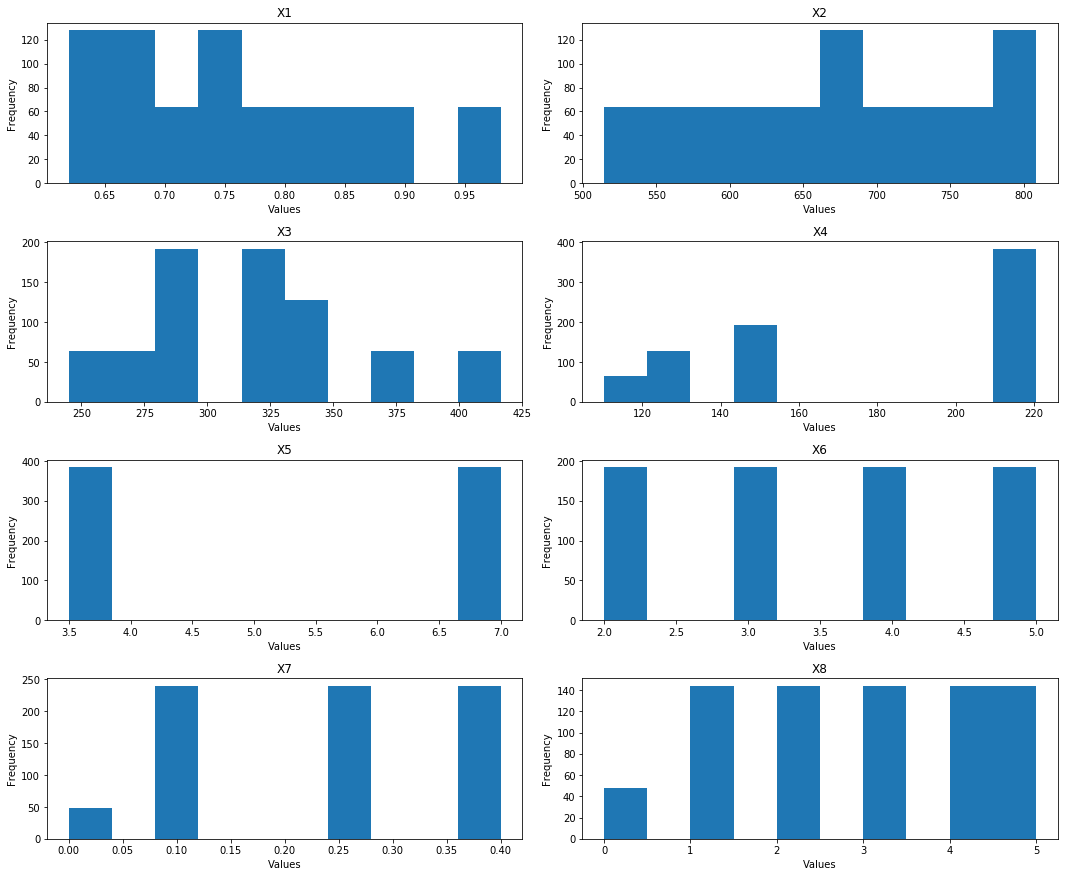

In [52]:
plotHists(X, X.columns)

In [53]:
X_reduced = dataset[['X1','X2','X3','X4','X5','X7']]


The next step is to split the dataset to training and testing sets. We'll train on training dataset and evaluate the current model settings by k-fold cross validation. This technique is considered to be a very precise evaluation, but it is not used that often due to its computational expensiveness. The model is trained k times and tested on the hold-out set and can therefore take a while with more complex datasets. However, our dataset is actually not that large nor are the models that performance-heavy, and hence we can afford it. To get a more accurate result, we repeat this evaluation 50 times and get a mean over the results. We do not test on the testing set until we've found the optimal model with k-fold cross validation and want to evaluate the model on an unseen data.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_reduced, y, test_size=0.2)

In [55]:
def rep_cross_val_score(model, X, y, cv, scoring, reps):
    sum = 0
    for i in range(0,reps):
        sum += cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
    return sum / reps

With the data splitted, we can train a simple linear regression model without any additional preprocessing and evaluate it to see how well the model performs.


In [56]:
lin_reg = LinearRegression()
error = rep_cross_val_score(lin_reg, X_train, y_train, 4, "neg_mean_squared_error", NUM_OF_REPS).mean()
error

-9.579055638173644

To judge this result, we need to know how large is it relative to the target values. Therefore, we get min and max values for both target columns to see this. This might not be be the most precise way, but it only serves to demonstrate roughly rounded error of the model.

In [57]:
def printError(y, error):
    min = y.min()
    max = y.max()
    
    print("MIN")
    print(min)
    print("\nMAX")
    print(max)
    print()
    diff0 = max[0] - min[0]
    diff1 = max[1] - min[1]
    print('Y1 (max - min) = ' + str(diff0))
    print('Y2 (max - min) = ' + str(diff1))
    sqrt_error = sqrt(-error)
    print("\nRoot mean squared error relative to the spread of Y1: " +
            str(round(sqrt_error, 2)) + " / " + str(diff0) + " = " + str(round(sqrt_error / diff0, 2)))
    print("\nRoot mean squared error relative to the spread of Y2: " +
            str(round(sqrt_error, 2)) + " / " + str(diff1) + " = " + str(round(sqrt_error / diff1, 2)))


In [58]:
printError(y, error)

MIN
Y1     6.01
Y2    10.90
dtype: float64

MAX
Y1    43.10
Y2    48.03
dtype: float64

Y1 (max - min) = 37.09
Y2 (max - min) = 37.13

Root mean squared error relative to the spread of Y1: 3.1 / 37.09 = 0.08

Root mean squared error relative to the spread of Y2: 3.1 / 37.13 = 0.08


The model would have a deviation of around 3.07 which is 8% from the spread of the both target columns. Now, we can try the reduced dataset, to see if removing the 2 feature columns helps in any way.


In [59]:
lin_reg = LinearRegression()
rep_cross_val_score(lin_reg, X_red_train, y_red_train, 4, "neg_mean_squared_error", NUM_OF_REPS).mean()


-9.589609963893166

The result demonstrates that removing the columns does not make a large difference in the linear regression model, however, we might keep the reduced dataset for other models, where it might.

To improve performance and possibly an accuracy of a model we need to scale the features. The 2 main options for scaling are MinMaxScaler and StandardScaler. MinMaxScaler scales and shifts the values to range between 0 and 1, whereas StandardScaler centres the values to 0 by removing the mean and divides by the variance to achieve unit variance. StandardScaler should be applied to data which is normally distributed, and can handle outliers. However, if the data is not normally distributed, MinMaxScaler is better. The disadvantage is its sensitivity to outliers. To decide which scaler to use, we need to plot histograms to see the features' distributions.

In [60]:
def plotHists(X, column_names):
    # Plot outputs
    num_of_features = X.shape[1]
    height = num_of_features*3
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
    else:
        X_vals = X.values

    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title(column_names[col])
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.tight_layout()
        # plt.hist(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
        #                                          " values for " + column_names[col])
        plt.hist(X_vals[:, col])
        index+=1
    plt.show()


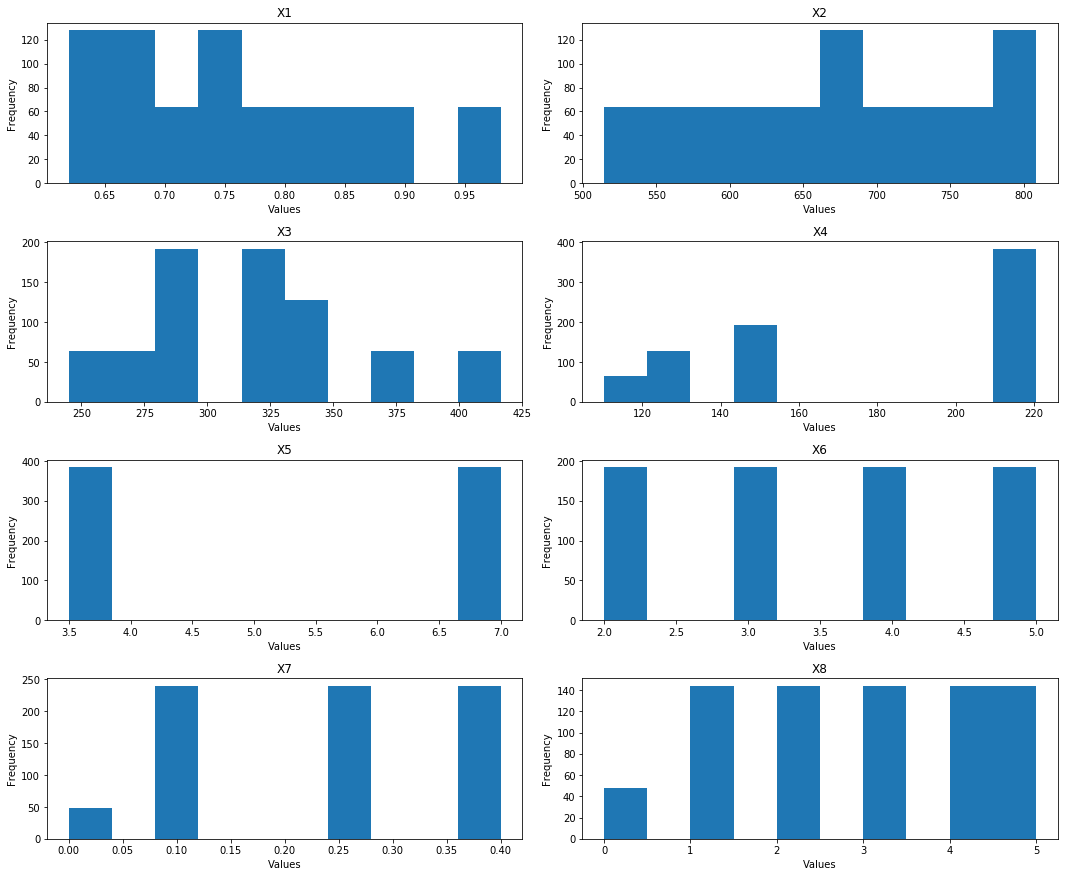

In [61]:
plotHists(X, X.columns)

We can conclude from the histograms that the data is not distributed normally, and therefore MinMaxScaler should be better.


In [62]:
lin_reg = LinearRegression(normalize=False)
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
cross_val_score(lin_reg, X_minmax, y_train, cv=4, scoring="neg_mean_squared_error").mean()

/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


-9.76121213024345

From the result, we assume that the scaling does not have any visible difference on the training. Nevertheless, we keep the scaled dataset, because the next step is to use the regularized linear regression and the regularized models are sensitive to the scale of the input features. Regularization should prevent the model from overfitting by constraining the weights. The scikit library offers 3 choices for regularized models that limit weights by raising the cost with these terms:
- Ridge: $\alpha\frac{1}{2}\sum_{i=1}^{n} \theta^2_i$
- Lasso: $\alpha\sum_{i=1}^{n} \lvert\theta_i\rvert$
- Elastic Net: $r\alpha\sum_{i=1}^{n} \lvert\theta_i\rvert$ + $\frac{1-r}{2}\alpha\sum_{i=1}^{n} \theta^2_i$

Ridge is good default, Lasso and Elastic Net are useful when we presume that only few features are relevant. Since most of are features are relevant, that is 6 of them have Pearson's coefficient above 0.26, we use Ridge. An important hyperparameter in Ridge is $\alpha$. The higher it is, the more regularized model we're getting. To find right $\alpha$, we implement a method that prints out mean squared error for Ridge models with alpha from given minimum to given maximum.

In [63]:
def frange(x, y, jump):
  while x < y:
    yield round(x,2)
    x += jump
      
def printAlphas(min, max, step):
    for i in frange(min, max, step):
        ridge = Ridge(alpha=i)
        ridge_score = rep_cross_val_score(ridge, X_minmax, y_train, cv=4, scoring="neg_mean_squared_error", reps=NUM_OF_REPS).mean()
        print(str(i) + " => " + str(ridge_score))


In [64]:
printAlphas(0.01, 0.1, 0.01)

0.01 => -9.58433936129546


0.02 => -9.5857671788131


0.03 => -9.58797702451528


0.04 => -9.590778982756024


0.05 => -9.594026230359233


0.06 => -9.597604681978044


0.07 => -9.601425324654077


0.08 => -9.605418487284638


0.09 => -9.609529517891032


0.1 => -9.613715495774384


Suprisingly, regularization only makes the model worse. This means that we're already underfitting, which might be due to the lack of data or due to the linear regression not being quite right for this task. Now we have enough information to evaluate the model. The model performs best without any scaling or regularization, that is with just the basic linear regression model. We can therefore evaluate it on the testing set.


In [121]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predicts = lin_reg.predict(X_test)    
print("Mean squared error: " + str(mean_squared_error(y_test, y_predicts)))

Mean squared error: 9.053646993822769


Additionally, we might demonstrate the accuracy of the linear model visually using our previously implemented function.

In [123]:
plotCorr(X_test, y_test, X.columns, 0, y_predicts)

Decision tree regressor: -3.0600244973474253


Random Forest regressor: -2.2117812996009465


In [124]:
plotCorr(X_test, y_test, X.columns, 1, y_predicts)

Decision tree regressor: -3.0600244973474253


Random Forest regressor: -2.2117812996009465


Since the paper describes using Random Forest as the optimal model, we might try the decision tree regressor instead to see how it compares. The decision tree uses a tree-like model of decisions. Each node has a dataset feature based on which it splits the tree binary. The leaf nodes contain the class labels or regression values to which the samples are assigned to. When we want to predict a sample, we pass it through the tree and based on a sequence of binary decisions at each node, it is assigned to the the most probable result. To train the model, when splitting the tree, we're looking for a split with the lowest cost, that is a split with most homogeneous branches. The cost function is a simple squared error in the case of regression. The decision trees are great at predicting tabular data with up to 100 numerical or categorical features and, unlike linear models, they can capture non-linear interactions between features. Additionally, the data does not require an extensive preprocessing. However, the decision trees are prone to overfitting and do not account for the global optimum due to the algorithm's greediness. To prevent the overfitting, we should either prune the tree or restrict the maximum number of nodes, maximum depth or other hyperparameters.

With Random Forests, a number of decision trees is trained to the largest extent possible and there is no pruning, which means there's a low bias and a high variance. Some constant number of features, which is lower than the total number of features, is chosen at each node and the best split out of these features is applied on that node. To predict a new sample, it is run through all these trees and the final prediction is the average of predictions from the trees. This technique is used to limit both errors due to variance and errors due to bias.

Looking at outr dataset, the number of samples is fairly small and so the Random Forest might be too robust. We can compare the mean squared errors of both models.

In [163]:
dec_tree = tree.DecisionTreeRegressor()
rand_tree = ensemble.RandomForestRegressor()
print("Decision tree regressor: " + str(rep_cross_val_score(dec_tree, X_train, y_train, 4, 
                                                            'neg_mean_squared_error', NUM_OF_REPS)))
print("Random Forest regressor: " + str(rep_cross_val_score(rand_tree, X_train, y_train, 4, 
                                                            'neg_mean_squared_error', NUM_OF_REPS)))

Decision tree regressor: -3.0600244973474253


Random Forest regressor: -2.2117812996009465


As we can see, the difference is not so large. Since the decision tree is prone to overfitting, we might reduce the number of features to only the most relevant. Previously, we analysed the Pearson's correlation coefficient of each feature and find out that features X6 and X8 have a small linear relation to the target values. Let's train using the reduced dataset without these columns.

In [168]:
dec_tree = tree.DecisionTreeRegressor()
rand_tree = ensemble.RandomForestRegressor()
print("Decision tree regressor: " + str(rep_cross_val_score(dec_tree, X_red_train, y_red_train, 4, 
                                                            'neg_mean_squared_error', NUM_OF_REPS)))
print("Random Forest regressor: " + str(rep_cross_val_score(rand_tree, X_red_train, y_red_train, 4, 
                                                            'neg_mean_squared_error', NUM_OF_REPS)))


Decision tree regressor: -1.6758828009144806


Random Forest regressor: -1.6886448998906798


In [ ]:
lin_reg = tree.DecisionTreeRegressor()
lin_reg.fit(X_red_train, y_red_train)
y_predicts = lin_reg.predict(X_red_test)
mean_squared_error(y_red_test, y_predicts)


In [159]:
import graphviz 
dot_data = tree.export_graphviz(lin_reg, out_file=None, 
                     feature_names=X.columns[[0,1,2,3,4,6]],  
                     class_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("tree", format='png')

'tree.png'

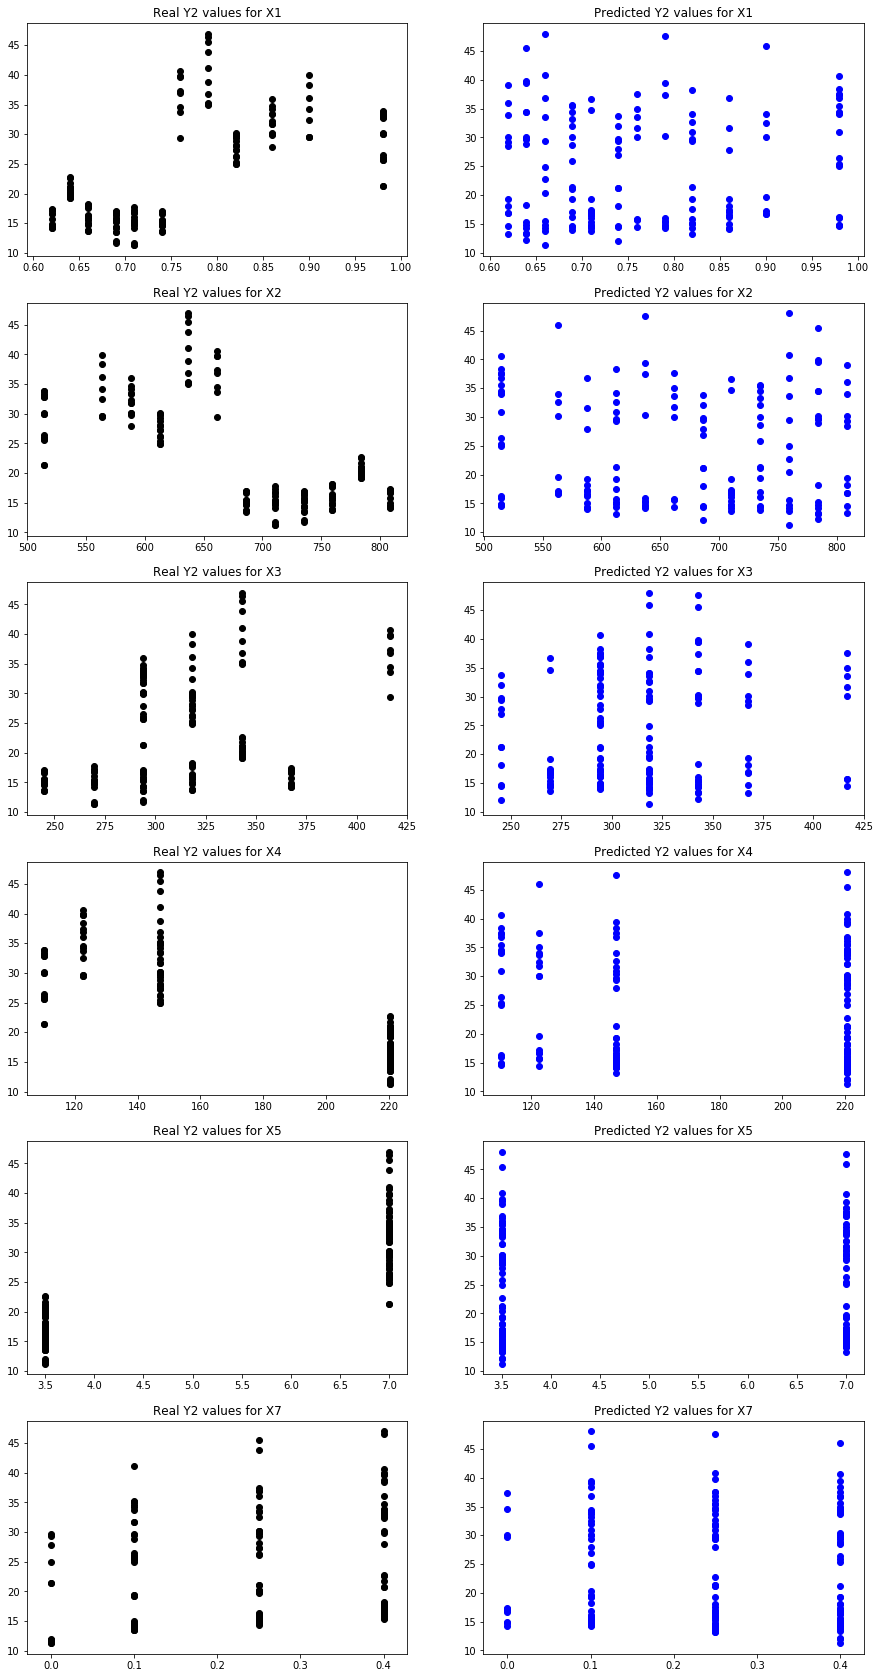

In [69]:
plotCorr(X_red_test, y_red_test, X_red_test.columns, 1, y_predicts)